# Cleaning Rent Burden Census Block Groups in Alameda County & Spatial Analysis

In this notebook, I will clean the census block group data so that I can use it for my spatial analysis of rent burden changes in Alameda County. Cleaning the data takes up a lot of memory, so I expect to start another notebook for the actual analysis.

Some key things to note before I begin, the census website did not have rent burden block group data from 2011. Our other analyses have compared census tracts from 2011 to 2019. However, since there is a lack of data for block groups, 2013 is the closests year and will still provide worthwhile analyses. Chaithra had the same issue, so we will change our time frame to focus on 2013 and 2019.

I'll start by importing my libraries and then input and clean my 2019 rent burden data.

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx
 
# to give more power to your figures (plots)
import matplotlib.pyplot as plt


/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## 2019 Rent Burden Data

In [2]:
rb2019 = gpd.read_file('2019RB.csv')

I want to get a look at the data and see what I'm working with. I know there will be a row I need to get rid of, but it could be at the top or at the bottom.

In [3]:
rb2019.head(3)

,B25070_001E,B25070_001M,B25070_002E,B25070_002M,B25070_003E,B25070_003M,B25070_004E,B25070_004M,B25070_005E,B25070_005M,...,B25070_008M,B25070_009E,B25070_009M,B25070_010E,B25070_010M,B25070_011E,B25070_011M,GEO_ID,NAME,geometry
0,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!Less than 10.0 percent,Margin of Error!!Total:!!Less than 10.0 percent,Estimate!!Total:!!10.0 to 14.9 percent,Margin of Error!!Total:!!10.0 to 14.9 percent,Estimate!!Total:!!15.0 to 19.9 percent,Margin of Error!!Total:!!15.0 to 19.9 percent,Estimate!!Total:!!20.0 to 24.9 percent,Margin of Error!!Total:!!20.0 to 24.9 percent,...,Margin of Error!!Total:!!35.0 to 39.9 percent,Estimate!!Total:!!40.0 to 49.9 percent,Margin of Error!!Total:!!40.0 to 49.9 percent,Estimate!!Total:!!50.0 percent or more,Margin of Error!!Total:!!50.0 percent or more,Estimate!!Total:!!Not computed,Margin of Error!!Total:!!Not computed,id,Geographic Area Name,None
1,143,65,42,35,0,12,10,15,41,47,...,15,9,13,25,19,7,11,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,114,34,13,14,19,16,27,18,19,14,...,8,0,12,21,17,0,12,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None


In [4]:
rb2019.tail(3)

,B25070_001E,B25070_001M,B25070_002E,B25070_002M,B25070_003E,B25070_003M,B25070_004E,B25070_004M,B25070_005E,B25070_005M,...,B25070_008M,B25070_009E,B25070_009M,B25070_010E,B25070_010M,B25070_011E,B25070_011M,GEO_ID,NAME,geometry
1046,51,29,0,12,0,12,19,23,10,10,...,12,5,7,0,12,0,12,1500000US060019832001,"Block Group 1, Census Tract 9832, Alameda Coun...",None
1047,0,12,0,12,0,12,0,12,0,12,...,12,0,12,0,12,0,12,1500000US060019900000,"Block Group 0, Census Tract 9900, Alameda Coun...",None
1048,268286,2245,8948,700,21773,960,32074,1181,35669,1166,...,701,23644,1163,63047,1575,10963,819,0500000US06001,"Alameda County, California",None


It was at the bottom! I also see that I need to drop the first row because it just has the column name information, which I will replace the current column name with. So I'll drop those rows and move on with cleaning up the dataset to only have the necessary columns. The dataset comes with margin of error columns, which won't be too useful for our analyses.

In [5]:
rb2019.shape

(1049, 25)

In [6]:
rb2019= rb2019.drop([1048])

In [7]:
rb2019 = rb2019.drop([0])

In [8]:
rb2019.shape

(1047, 25)

Great, we lost two rows which is what we needed. Now I'll get a list of the column names so I can begin replacing them.

In [9]:
list(rb2019)

['B25070_001E',
 'B25070_001M',
 'B25070_002E',
 'B25070_002M',
 'B25070_003E',
 'B25070_003M',
 'B25070_004E',
 'B25070_004M',
 'B25070_005E',
 'B25070_005M',
 'B25070_006E',
 'B25070_006M',
 'B25070_007E',
 'B25070_007M',
 'B25070_008E',
 'B25070_008M',
 'B25070_009E',
 'B25070_009M',
 'B25070_010E',
 'B25070_010M',
 'B25070_011E',
 'B25070_011M',
 'GEO_ID',
 'NAME',
 'geometry']

In [10]:
columns_to_keep =  ['B25070_001E',
                    'B25070_002E',
                    'B25070_003E',
                    'B25070_004E',
                    'B25070_005E',
                    'B25070_006E',
                    'B25070_007E',
                    'B25070_008E',
                    'B25070_009E',
                    'B25070_010E',
                    'B25070_011E',
                    'GEO_ID',
                    'NAME',
                    'geometry']

Here I copy and pasted the previous list and took out the margin of error columns.

In [11]:
rb2019 = rb2019[columns_to_keep]

In [12]:
rb2019.head(3)

,B25070_001E,B25070_002E,B25070_003E,B25070_004E,B25070_005E,B25070_006E,B25070_007E,B25070_008E,B25070_009E,B25070_010E,B25070_011E,GEO_ID,NAME,geometry
1,143,42,0,10,41,0,0,9,9,25,7,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,114,13,19,27,19,6,3,6,0,21,0,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,208,21,46,51,18,40,13,11,8,0,0,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None


Great! It worked. Now I'll go on to replace the current column names with names that will actually be helpful.

In [13]:
rb2019.columns.to_list()

['B25070_001E',
 'B25070_002E',
 'B25070_003E',
 'B25070_004E',
 'B25070_005E',
 'B25070_006E',
 'B25070_007E',
 'B25070_008E',
 'B25070_009E',
 'B25070_010E',
 'B25070_011E',
 'GEO_ID',
 'NAME',
 'geometry']

In [14]:
rb2019.columns = ['Total',
                  '<10% 2019',
                  '10-14.9% 2019',
                  '15-19.9% 2019',
                  '20-24.9% 2019',
                  '25-29.9% 2019',
                  '30-34.9% 2019',
                  '35-39.9% 2019',
                  '40-49.9% 2019',
                  '>50% 2019',
                  'Not Computed 2019',
                  'GEO_ID',
                  'Name',
                 'geometry']

Here I renamed the columns to actually useful names! I see that the GEO_ID is huge, and we only want the FIPS code, so I will replace the '1500000US' with '' (an empty space) so that it essentially is replaced with nothing. 

In [15]:
rb2019.head(2)

,Total,<10% 2019,10-14.9% 2019,15-19.9% 2019,20-24.9% 2019,25-29.9% 2019,30-34.9% 2019,35-39.9% 2019,40-49.9% 2019,>50% 2019,Not Computed 2019,GEO_ID,Name,geometry
1,143,42,0,10,41,0,0,9,9,25,7,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,114,13,19,27,19,6,3,6,0,21,0,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None


In [16]:
rb2019['GEO_ID'] = rb2019['GEO_ID'].str.replace('1500000US','')
rb2019.head()

,Total,<10% 2019,10-14.9% 2019,15-19.9% 2019,20-24.9% 2019,25-29.9% 2019,30-34.9% 2019,35-39.9% 2019,40-49.9% 2019,>50% 2019,Not Computed 2019,GEO_ID,Name,geometry
1,143,42,0,10,41,0,0,9,9,25,7,060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,114,13,19,27,19,6,3,6,0,21,0,060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,208,21,46,51,18,40,13,11,8,0,0,060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None
4,141,9,29,30,46,0,15,12,0,0,0,060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",None
5,490,31,93,95,16,78,61,41,0,62,13,060014003002,"Block Group 2, Census Tract 4003, Alameda Coun...",None


In [17]:
rb2019= rb2019[['Total',
                  '<10% 2019',
                  '10-14.9% 2019',
                  '15-19.9% 2019',
                  '20-24.9% 2019',
                  '25-29.9% 2019',
                  '30-34.9% 2019',
                  '35-39.9% 2019',
                  '40-49.9% 2019',
                  '>50% 2019',
                  'GEO_ID',
                  'Name']]

Here I got rid of the geometry and not computed columns.

In [18]:
rb2019.head(3)

,Total,<10% 2019,10-14.9% 2019,15-19.9% 2019,20-24.9% 2019,25-29.9% 2019,30-34.9% 2019,35-39.9% 2019,40-49.9% 2019,>50% 2019,GEO_ID,Name
1,143,42,0,10,41,0,0,9,9,25,060014001001,"Block Group 1, Census Tract 4001, Alameda Coun..."
2,114,13,19,27,19,6,3,6,0,21,060014002001,"Block Group 1, Census Tract 4002, Alameda Coun..."
3,208,21,46,51,18,40,13,11,8,0,060014002002,"Block Group 2, Census Tract 4002, Alameda Coun..."


Now I'm going to join the pandas file with the block group shapefile to turn my dataset into a geodataframe. This will add the correct geometry information for each block group.

In [19]:
blockshape = gpd.read_file('tl_2013_06_bg.shp')

In [20]:
blockshape.shape

(23212, 13)

It's a huge file, but I only need to keep certain columns. Also, when I join this with my rb2019 file, it'll only keep the rows that have matching values.

In [21]:
blockshape.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,025,940000,3,060259400003,Block Group 3,G5030,S,12266442,680335,+32.7424027,-114.6675664,"POLYGON ((-114.72653 32.71824, -114.72639 32.7..."
1,06,025,010800,2,060250108002,Block Group 2,G5030,S,59331705,0,+32.7658550,-115.3923893,"POLYGON ((-115.43082 32.73090, -115.43082 32.7..."
2,06,025,010800,1,060250108001,Block Group 1,G5030,S,230656790,0,+32.8363463,-115.3514134,"POLYGON ((-115.45784 32.90895, -115.45773 32.9..."
3,06,025,011100,3,060250111003,Block Group 3,G5030,S,1209336,0,+32.7932442,-115.6903925,"POLYGON ((-115.70134 32.79085, -115.70091 32.7..."
4,06,073,010013,2,060730100132,Block Group 2,G5030,S,404606,0,+32.5564082,-117.0507980,"POLYGON ((-117.05430 32.55542, -117.05430 32.5..."


In [22]:
rb2019.columns=['Total',
                  '<10% 2019',
                  '10-14.9% 2019',
                  '15-19.9% 2019',
                  '20-24.9% 2019',
                  '25-29.9% 2019',
                  '30-34.9% 2019',
                  '35-39.9% 2019',
                  '40-49.9% 2019',
                  '>50% 2019',
                  'GEOID',
                  'Name']

Here I changed the GEO_ID name to GEOID so that it matches the shapefile. I need to do the join on GEOID, so they need to match. I'll also clean up the blockshape shapefile so that it only has the two columns I need, GEOID and geometry.

In [23]:
rb2019.shape #just getting the shape again so I can double check everything merges correctly.

(1047, 12)

In [24]:
blockshape=blockshape[['GEOID', 'geometry']] #only keeping the necessary columns

In [25]:
rb_block2019 = blockshape.merge(rb2019, on='GEOID')

In [26]:
rb_block2019.head()

,GEOID,geometry,Total,<10% 2019,10-14.9% 2019,15-19.9% 2019,20-24.9% 2019,25-29.9% 2019,30-34.9% 2019,35-39.9% 2019,40-49.9% 2019,>50% 2019,Name
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...",79,0,0,42,37,0,0,0,0,0,"Block Group 1, Census Tract 4403.35, Alameda C..."
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...",301,0,8,41,48,60,65,0,0,79,"Block Group 2, Census Tract 4423.01, Alameda C..."
2,060014060001,"POLYGON ((-122.26735 37.78872, -122.26445 37.7...",339,0,18,100,36,88,57,0,10,25,"Block Group 1, Census Tract 4060, Alameda Coun..."
3,060014337001,"POLYGON ((-122.11467 37.68870, -122.11462 37.6...",232,0,0,13,53,21,0,33,60,45,"Block Group 1, Census Tract 4337, Alameda Coun..."
4,060014364012,"POLYGON ((-122.07302 37.67305, -122.07265 37.6...",382,0,36,29,28,38,45,47,0,159,"Block Group 2, Census Tract 4364.01, Alameda C..."


In [27]:
rb_block2019.shape

(1047, 13)

Super huge dataset, but it worked! Cleaner than before too. Now I want to make sure my data is in the right format so that I can do some arithmetic functions to normalize the data. But first, I want to make a dataset that only has the block group, geometry, and total population. This will be important for the spatial auto correlation maps I will produce later. That way we can see which census block groups have had the most change because they will stand out on the map. I'll do this by making a copy of this newly joined dataset.

In [28]:
bg = rb_block2019.copy()

In [29]:
bg.head(3)

,GEOID,geometry,Total,<10% 2019,10-14.9% 2019,15-19.9% 2019,20-24.9% 2019,25-29.9% 2019,30-34.9% 2019,35-39.9% 2019,40-49.9% 2019,>50% 2019,Name
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...",79,0,0,42,37,0,0,0,0,0,"Block Group 1, Census Tract 4403.35, Alameda C..."
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...",301,0,8,41,48,60,65,0,0,79,"Block Group 2, Census Tract 4423.01, Alameda C..."
2,060014060001,"POLYGON ((-122.26735 37.78872, -122.26445 37.7...",339,0,18,100,36,88,57,0,10,25,"Block Group 1, Census Tract 4060, Alameda Coun..."


In [30]:
list(bg)

['GEOID',
 'geometry',
 'Total',
 '<10% 2019',
 '10-14.9% 2019',
 '15-19.9% 2019',
 '20-24.9% 2019',
 '25-29.9% 2019',
 '30-34.9% 2019',
 '35-39.9% 2019',
 '40-49.9% 2019',
 '>50% 2019',
 'Name']

In [31]:
col_keep = ['GEOID',
 'geometry',
 'Total']

In [32]:
bg = bg[col_keep]
bg.head(2)

,GEOID,geometry,Total
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...",79
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...",301


Awesome, now I'm going to save this for later use. After this, I'm going to project it to web mercator and take see what it looks like.

In [33]:
bg['Total'] = bg['Total'].astype(int)
bg.describe()

,Total
count,1047.000000
mean,256.242598
std,225.732101
min,0.000000
25%,89.000000
50%,197.000000
75%,349.000000
max,1518.000000


I wanted to see what the range in the populations were so that I can delete the block groups that have too few people. I'm going to cut it off a 50 people. 

In [34]:
bg.sort_values(by='Total').head(30)

,GEOID,geometry,Total
974,060019820001,"POLYGON ((-122.31439 37.79484, -122.31350 37.7...",0
566,060014513002,"POLYGON ((-121.80195 37.68391, -121.80195 37.6...",0
739,060014431023,"POLYGON ((-121.93466 37.50622, -121.93435 37.5...",0
542,060014272005,"POLYGON ((-122.25694 37.78573, -122.25558 37.7...",0
221,060014416011,"POLYGON ((-122.03634 37.56651, -122.03567 37.5...",0
675,060014403043,"POLYGON ((-122.08120 37.58757, -122.08097 37.5...",0
377,060014506044,"POLYGON ((-121.89485 37.67759, -121.89484 37.6...",0
226,060014506022,"POLYGON ((-121.93029 37.68880, -121.93008 37.6...",0
444,060014261006,"POLYGON ((-122.22576 37.82096, -122.22575 37.8...",0
365,060014330001,"POLYGON ((-122.14545 37.72172, -122.14534 37.7...",0


In [35]:
# delete less than 50 population geographies
bg = bg[bg['Total']>50]

In [36]:
bg.to_file("Alameda_BG.geojson", driver='GeoJSON') #saving this so I can use it later!

In [37]:
# reprojecting to web mercator
bg_wm = bg.to_crs(epsg=3857)

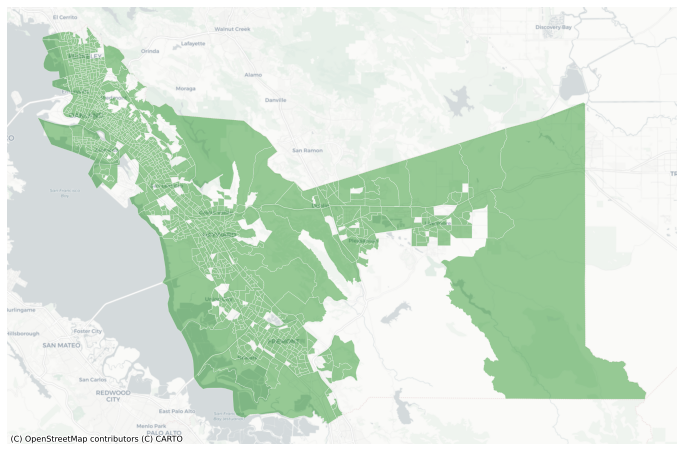

In [38]:
# plot
fig, ax = plt.subplots(figsize=(12,12))

bg_wm.plot(ax=ax,
         color='green', 
         edgecolor='white',
         lw=0.5,
         alpha=0.4)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

That's fine for now, I'm a little worried that the populations near our transit stops might not have >50 people, which will greatly impact the validity of our analysis. I'll just save this dataset so that I can use it later.

In [39]:
bg_wm.to_file("Alameda_BG.geojson", driver='GeoJSON')

Now I want to double check my data type


In [40]:
rb_block2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1047 entries, 0 to 1046
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   GEOID          1047 non-null   object  
 1   geometry       1047 non-null   geometry
 2   Total          1047 non-null   object  
 3   <10% 2019      1047 non-null   object  
 4   10-14.9% 2019  1047 non-null   object  
 5   15-19.9% 2019  1047 non-null   object  
 6   20-24.9% 2019  1047 non-null   object  
 7   25-29.9% 2019  1047 non-null   object  
 8   30-34.9% 2019  1047 non-null   object  
 9   35-39.9% 2019  1047 non-null   object  
 10  40-49.9% 2019  1047 non-null   object  
 11  >50% 2019      1047 non-null   object  
 12  Name           1047 non-null   object  
dtypes: geometry(1), object(12)
memory usage: 114.5+ KB


In [41]:
random_tract= rb_block2019.sample(1)

In [42]:
random_tract

,GEOID,geometry,Total,<10% 2019,10-14.9% 2019,15-19.9% 2019,20-24.9% 2019,25-29.9% 2019,30-34.9% 2019,35-39.9% 2019,40-49.9% 2019,>50% 2019,Name
612,060014278003,"POLYGON ((-122.27509 37.77141, -122.27508 37.7...",202,0,121,49,11,0,0,21,0,0,"Block Group 3, Census Tract 4278, Alameda Coun..."


In [43]:
type(random_tract.iloc[0]['<10% 2019'])

str

So here I created a variable of just a random block group and I wanted to check its data type. We want floats, not strings, but looks like they are strings! So, I'll create a loop function to change them into floats (decimals)

In [44]:
list(rb_block2019)

['GEOID',
 'geometry',
 'Total',
 '<10% 2019',
 '10-14.9% 2019',
 '15-19.9% 2019',
 '20-24.9% 2019',
 '25-29.9% 2019',
 '30-34.9% 2019',
 '35-39.9% 2019',
 '40-49.9% 2019',
 '>50% 2019',
 'Name']

In [45]:
dtypes = ['Total', 
          '<10% 2019',
          '10-14.9% 2019',
          '15-19.9% 2019',
          '20-24.9% 2019',
          '25-29.9% 2019',
          '30-34.9% 2019',
          '35-39.9% 2019',
          '40-49.9% 2019',
          '>50% 2019']

In [46]:
for i in dtypes:
    rb_block2019[i]=rb_block2019[i].astype(float)

In [47]:
random_tract2 = rb_block2019.sample(1)

In [48]:
type(random_tract2.iloc[0][ '<10% 2019'])

numpy.float64

In [49]:
rb_block2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1047 entries, 0 to 1046
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   GEOID          1047 non-null   object  
 1   geometry       1047 non-null   geometry
 2   Total          1047 non-null   float64 
 3   <10% 2019      1047 non-null   float64 
 4   10-14.9% 2019  1047 non-null   float64 
 5   15-19.9% 2019  1047 non-null   float64 
 6   20-24.9% 2019  1047 non-null   float64 
 7   25-29.9% 2019  1047 non-null   float64 
 8   30-34.9% 2019  1047 non-null   float64 
 9   35-39.9% 2019  1047 non-null   float64 
 10  40-49.9% 2019  1047 non-null   float64 
 11  >50% 2019      1047 non-null   float64 
 12  Name           1047 non-null   object  
dtypes: float64(10), geometry(1), object(2)
memory usage: 114.5+ KB


Great! It worked. Now I want to normalize the data. Counts are cool, but percent's give more relative information. I'll do this by creating a function that will create a percentages column in my dataset.

In [50]:
def createpercentage(block):
    for x in dtypes:
        block[("Percent " + x)] = block[x]/block['Total']*100
        print(x, "Completed")

In [51]:
createpercentage(rb_block2019)

Total Completed
<10% 2019 Completed
10-14.9% 2019 Completed
15-19.9% 2019 Completed
20-24.9% 2019 Completed
25-29.9% 2019 Completed
30-34.9% 2019 Completed
35-39.9% 2019 Completed
40-49.9% 2019 Completed
>50% 2019 Completed


In [52]:
rb_block2019.head(2)

,GEOID,geometry,Total,<10% 2019,10-14.9% 2019,15-19.9% 2019,20-24.9% 2019,25-29.9% 2019,30-34.9% 2019,35-39.9% 2019,...,Percent Total,Percent <10% 2019,Percent 10-14.9% 2019,Percent 15-19.9% 2019,Percent 20-24.9% 2019,Percent 25-29.9% 2019,Percent 30-34.9% 2019,Percent 35-39.9% 2019,Percent 40-49.9% 2019,Percent >50% 2019
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...",79.0,0.0,0.0,42.0,37.0,0.0,0.0,0.0,...,100.0,0.0,0.000000,53.164557,46.835443,0.000000,0.000000,0.0,0.0,0.000000
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...",301.0,0.0,8.0,41.0,48.0,60.0,65.0,0.0,...,100.0,0.0,2.657807,13.621262,15.946844,19.933555,21.594684,0.0,0.0,26.245847


Great! Now to get rid of that count data, because the percent data is really what we're going to use. 

In [53]:
list(rb_block2019)

['GEOID',
 'geometry',
 'Total',
 '<10% 2019',
 '10-14.9% 2019',
 '15-19.9% 2019',
 '20-24.9% 2019',
 '25-29.9% 2019',
 '30-34.9% 2019',
 '35-39.9% 2019',
 '40-49.9% 2019',
 '>50% 2019',
 'Name',
 'Percent Total',
 'Percent <10% 2019',
 'Percent 10-14.9% 2019',
 'Percent 15-19.9% 2019',
 'Percent 20-24.9% 2019',
 'Percent 25-29.9% 2019',
 'Percent 30-34.9% 2019',
 'Percent 35-39.9% 2019',
 'Percent 40-49.9% 2019',
 'Percent >50% 2019']

In [54]:
keep1 = ['GEOID',
         'geometry',
         'Name',
 'Percent Total',
 'Percent <10% 2019',
 'Percent 10-14.9% 2019',
 'Percent 15-19.9% 2019',
 'Percent 20-24.9% 2019',
 'Percent 25-29.9% 2019',
 'Percent 30-34.9% 2019',
 'Percent 35-39.9% 2019',
 'Percent 40-49.9% 2019',
 'Percent >50% 2019']

In [55]:
rb2019_pct = rb_block2019[keep1]

In [56]:
rb2019_pct.head(2)

,GEOID,geometry,Name,Percent Total,Percent <10% 2019,Percent 10-14.9% 2019,Percent 15-19.9% 2019,Percent 20-24.9% 2019,Percent 25-29.9% 2019,Percent 30-34.9% 2019,Percent 35-39.9% 2019,Percent 40-49.9% 2019,Percent >50% 2019
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...","Block Group 1, Census Tract 4403.35, Alameda C...",100.0,0.0,0.000000,53.164557,46.835443,0.000000,0.000000,0.0,0.0,0.000000
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...","Block Group 2, Census Tract 4423.01, Alameda C...",100.0,0.0,2.657807,13.621262,15.946844,19.933555,21.594684,0.0,0.0,26.245847


Awesome. Now I want to save this just so that I can use it later without going through all that work again. The following code adds the data to my jupyterhub folder, which I can then download. I'll then make a copy so that I don't mess with this cleaned dataset when I do some other work. 

In [57]:
rb2019_pct.to_file("RB_2019.geojson", driver='GeoJSON')

In [58]:
cln_rb2019 = rb2019_pct.copy()

In [59]:
cln_rb2019.head(2)

,GEOID,geometry,Name,Percent Total,Percent <10% 2019,Percent 10-14.9% 2019,Percent 15-19.9% 2019,Percent 20-24.9% 2019,Percent 25-29.9% 2019,Percent 30-34.9% 2019,Percent 35-39.9% 2019,Percent 40-49.9% 2019,Percent >50% 2019
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...","Block Group 1, Census Tract 4403.35, Alameda C...",100.0,0.0,0.000000,53.164557,46.835443,0.000000,0.000000,0.0,0.0,0.000000
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...","Block Group 2, Census Tract 4423.01, Alameda C...",100.0,0.0,2.657807,13.621262,15.946844,19.933555,21.594684,0.0,0.0,26.245847


In [60]:
cln_rb2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1047 entries, 0 to 1046
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   GEOID                  1047 non-null   object  
 1   geometry               1047 non-null   geometry
 2   Name                   1047 non-null   object  
 3   Percent Total          1022 non-null   float64 
 4   Percent <10% 2019      1022 non-null   float64 
 5   Percent 10-14.9% 2019  1022 non-null   float64 
 6   Percent 15-19.9% 2019  1022 non-null   float64 
 7   Percent 20-24.9% 2019  1022 non-null   float64 
 8   Percent 25-29.9% 2019  1022 non-null   float64 
 9   Percent 30-34.9% 2019  1022 non-null   float64 
 10  Percent 35-39.9% 2019  1022 non-null   float64 
 11  Percent 40-49.9% 2019  1022 non-null   float64 
 12  Percent >50% 2019      1022 non-null   float64 
dtypes: float64(10), geometry(1), object(2)
memory usage: 114.5+ KB


In [61]:
sumcolumn = cln_rb2019["Percent 30-34.9% 2019"] + cln_rb2019["Percent 35-39.9% 2019"] + cln_rb2019["Percent 40-49.9% 2019"] 

I wanted to make a column for >30% because rent burden is defined as a household spending more than 30% of their income on rent. It will be helpful to have this column so that I can specifically call it out on my future maps. 

In [62]:
cln_rb2019[">30% 2019"] = sumcolumn

In [63]:
cln_rb2019.head(3)

,GEOID,geometry,Name,Percent Total,Percent <10% 2019,Percent 10-14.9% 2019,Percent 15-19.9% 2019,Percent 20-24.9% 2019,Percent 25-29.9% 2019,Percent 30-34.9% 2019,Percent 35-39.9% 2019,Percent 40-49.9% 2019,Percent >50% 2019,>30% 2019
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...","Block Group 1, Census Tract 4403.35, Alameda C...",100.0,0.0,0.000000,53.164557,46.835443,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...","Block Group 2, Census Tract 4423.01, Alameda C...",100.0,0.0,2.657807,13.621262,15.946844,19.933555,21.594684,0.0,0.000000,26.245847,21.594684
2,060014060001,"POLYGON ((-122.26735 37.78872, -122.26445 37.7...","Block Group 1, Census Tract 4060, Alameda Coun...",100.0,0.0,5.309735,29.498525,10.619469,25.958702,16.814159,0.0,2.949853,7.374631,19.764012


Now I'm going to do the same thing for 2013 data. After that, I will join the tables and create a percent change column to see how things changed between the two years. 

In [64]:
rb2013 = gpd.read_file('2013RB.csv')

In [65]:
rb2013.head(3)

,B25070_001E,B25070_001M,B25070_002E,B25070_002M,B25070_003E,B25070_003M,B25070_004E,B25070_004M,B25070_005E,B25070_005M,...,B25070_008M,B25070_009E,B25070_009M,B25070_010E,B25070_010M,B25070_011E,B25070_011M,GEO_ID,NAME,geometry
0,Estimate!!Total,Margin of Error!!Total,Estimate!!Total!!Less than 10.0 percent,Margin of Error!!Total!!Less than 10.0 percent,Estimate!!Total!!10.0 to 14.9 percent,Margin of Error!!Total!!10.0 to 14.9 percent,Estimate!!Total!!15.0 to 19.9 percent,Margin of Error!!Total!!15.0 to 19.9 percent,Estimate!!Total!!20.0 to 24.9 percent,Margin of Error!!Total!!20.0 to 24.9 percent,...,Margin of Error!!Total!!35.0 to 39.9 percent,Estimate!!Total!!40.0 to 49.9 percent,Margin of Error!!Total!!40.0 to 49.9 percent,Estimate!!Total!!50.0 percent or more,Margin of Error!!Total!!50.0 percent or more,Estimate!!Total!!Not computed,Margin of Error!!Total!!Not computed,id,Geographic Area Name,None
1,232,77,31,50,35,24,61,43,16,21,...,12,0,12,75,56,0,12,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,118,36,4,6,22,23,31,22,22,19,...,7,5,8,2,5,0,12,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None


In [66]:
rb2013.tail(3)

,B25070_001E,B25070_001M,B25070_002E,B25070_002M,B25070_003E,B25070_003M,B25070_004E,B25070_004M,B25070_005E,B25070_005M,...,B25070_008M,B25070_009E,B25070_009M,B25070_010E,B25070_010M,B25070_011E,B25070_011M,GEO_ID,NAME,geometry
1046,129,44,13,20,25,31,25,15,17,16,...,17,0,12,23,33,0,12,1500000US060019832001,"Block Group 1, Census Tract 9832, Alameda Coun...",None
1047,0,12,0,12,0,12,0,12,0,12,...,12,0,12,0,12,0,12,1500000US060019900000,"Block Group 0, Census Tract 9900, Alameda Coun...",None
1048,255111,2318,6243,490,18054,727,29371,1055,32697,1290,...,835,20914,1108,66698,1621,10894,780,0500000US06001,"Alameda County, California",None


In [67]:
rb2013= rb2013.drop([1048])

In [68]:
rb2013= rb2013.drop([0])

In [69]:
list(rb2013)

['B25070_001E',
 'B25070_001M',
 'B25070_002E',
 'B25070_002M',
 'B25070_003E',
 'B25070_003M',
 'B25070_004E',
 'B25070_004M',
 'B25070_005E',
 'B25070_005M',
 'B25070_006E',
 'B25070_006M',
 'B25070_007E',
 'B25070_007M',
 'B25070_008E',
 'B25070_008M',
 'B25070_009E',
 'B25070_009M',
 'B25070_010E',
 'B25070_010M',
 'B25070_011E',
 'B25070_011M',
 'GEO_ID',
 'NAME',
 'geometry']

In [70]:
columns_to_keep2= ['B25070_001E',
                   'B25070_002E',
                   'B25070_003E',
                   'B25070_004E',
                   'B25070_005E',
                   'B25070_006E',
                   'B25070_007E',
                   'B25070_008E',
                   'B25070_009E',
                   'B25070_010E',
                   'B25070_011E',
                   'GEO_ID',
                   'NAME',
                   'geometry']

In [71]:
rb2013= rb2013[columns_to_keep2]

In [72]:
rb2013.head(3)

,B25070_001E,B25070_002E,B25070_003E,B25070_004E,B25070_005E,B25070_006E,B25070_007E,B25070_008E,B25070_009E,B25070_010E,B25070_011E,GEO_ID,NAME,geometry
1,232,31,35,61,16,6,8,0,0,75,0,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,118,4,22,31,22,18,9,5,5,2,0,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,138,13,13,38,17,28,9,0,3,12,5,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None


In [73]:
rb2013.columns = ['Total',
                  '<10% 2013',
                  '10-14.9% 2013',
                  '15-19.9% 2013',
                  '20-24.9% 2013',
                  '25-29.9% 2013',
                  '30-34.9% 2013',
                  '35-39.9% 2013',
                  '40-49.9% 2013',
                  '>50% 2013',
                  'Not Computed 2013',
                  'GEO_ID',
                  'Name',
                 'geometry']

In [74]:
rb2013.head(3)

,Total,<10% 2013,10-14.9% 2013,15-19.9% 2013,20-24.9% 2013,25-29.9% 2013,30-34.9% 2013,35-39.9% 2013,40-49.9% 2013,>50% 2013,Not Computed 2013,GEO_ID,Name,geometry
1,232,31,35,61,16,6,8,0,0,75,0,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,118,4,22,31,22,18,9,5,5,2,0,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,138,13,13,38,17,28,9,0,3,12,5,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None


In [75]:
rb2013['GEO_ID'] = rb2013['GEO_ID'].str.replace('1500000US','')
rb2013.head()

,Total,<10% 2013,10-14.9% 2013,15-19.9% 2013,20-24.9% 2013,25-29.9% 2013,30-34.9% 2013,35-39.9% 2013,40-49.9% 2013,>50% 2013,Not Computed 2013,GEO_ID,Name,geometry
1,232,31,35,61,16,6,8,0,0,75,0,060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,118,4,22,31,22,18,9,5,5,2,0,060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,138,13,13,38,17,28,9,0,3,12,5,060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None
4,196,15,27,30,65,0,12,0,0,47,0,060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",None
5,346,0,55,43,46,0,28,0,34,140,0,060014003002,"Block Group 2, Census Tract 4003, Alameda Coun...",None


In [76]:
rb2013.columns=['Total',
                  '<10% 2013',
                  '10-14.9% 2013',
                  '15-19.9% 2013',
                  '20-24.9% 2013',
                  '25-29.9% 2013',
                  '30-34.9% 2013',
                  '35-39.9% 2013',
                  '40-49.9% 2013',
                  '>50% 2013',
                  'Not Computed 2013',
                  'GEOID',
                  'Name',
                 'geometry']

In [77]:
rb2013.head(3)

,Total,<10% 2013,10-14.9% 2013,15-19.9% 2013,20-24.9% 2013,25-29.9% 2013,30-34.9% 2013,35-39.9% 2013,40-49.9% 2013,>50% 2013,Not Computed 2013,GEOID,Name,geometry
1,232,31,35,61,16,6,8,0,0,75,0,060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,118,4,22,31,22,18,9,5,5,2,0,060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,138,13,13,38,17,28,9,0,3,12,5,060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None


In [78]:
rb2013= rb2013[['Total',
                  '<10% 2013',
                  '10-14.9% 2013',
                  '15-19.9% 2013',
                  '20-24.9% 2013',
                  '25-29.9% 2013',
                  '30-34.9% 2013',
                  '35-39.9% 2013',
                  '40-49.9% 2013',
                  '>50% 2013',
                  'GEOID',
                  'Name']]

In [79]:
rb2013.head(3)

,Total,<10% 2013,10-14.9% 2013,15-19.9% 2013,20-24.9% 2013,25-29.9% 2013,30-34.9% 2013,35-39.9% 2013,40-49.9% 2013,>50% 2013,GEOID,Name
1,232,31,35,61,16,6,8,0,0,75,060014001001,"Block Group 1, Census Tract 4001, Alameda Coun..."
2,118,4,22,31,22,18,9,5,5,2,060014002001,"Block Group 1, Census Tract 4002, Alameda Coun..."
3,138,13,13,38,17,28,9,0,3,12,060014002002,"Block Group 2, Census Tract 4002, Alameda Coun..."


In [80]:
random= rb2013.sample(1)
random

,Total,<10% 2013,10-14.9% 2013,15-19.9% 2013,20-24.9% 2013,25-29.9% 2013,30-34.9% 2013,35-39.9% 2013,40-49.9% 2013,>50% 2013,GEOID,Name
495,236,0,0,65,39,33,9,0,15,56,060014281003,"Block Group 3, Census Tract 4281, Alameda Coun..."


In [81]:
dtypes2 = ['Total',
                  '<10% 2013',
                  '10-14.9% 2013',
                  '15-19.9% 2013',
                  '20-24.9% 2013',
                  '25-29.9% 2013',
                  '30-34.9% 2013',
                  '35-39.9% 2013',
                  '40-49.9% 2013',
                  '>50% 2013']

In [82]:
for i in dtypes2:
    rb2013[i]=rb2013[i].astype(float)

In [83]:
rb2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 1 to 1047
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Total          1047 non-null   float64
 1   <10% 2013      1047 non-null   float64
 2   10-14.9% 2013  1047 non-null   float64
 3   15-19.9% 2013  1047 non-null   float64
 4   20-24.9% 2013  1047 non-null   float64
 5   25-29.9% 2013  1047 non-null   float64
 6   30-34.9% 2013  1047 non-null   float64
 7   35-39.9% 2013  1047 non-null   float64
 8   40-49.9% 2013  1047 non-null   float64
 9   >50% 2013      1047 non-null   float64
 10  GEOID          1047 non-null   object 
 11  Name           1047 non-null   object 
dtypes: float64(10), object(2)
memory usage: 106.3+ KB


In [84]:
def createpercentage2(block):
    for x in dtypes2:
        block[("Percent " + x)] = block[x]/block['Total']*100
        print(x, "Completed")

In [85]:
createpercentage2(rb2013)

Total Completed
<10% 2013 Completed
10-14.9% 2013 Completed
15-19.9% 2013 Completed
20-24.9% 2013 Completed
25-29.9% 2013 Completed
30-34.9% 2013 Completed
35-39.9% 2013 Completed
40-49.9% 2013 Completed
>50% 2013 Completed


In [86]:
rb2013.head(2)

,Total,<10% 2013,10-14.9% 2013,15-19.9% 2013,20-24.9% 2013,25-29.9% 2013,30-34.9% 2013,35-39.9% 2013,40-49.9% 2013,>50% 2013,...,Percent Total,Percent <10% 2013,Percent 10-14.9% 2013,Percent 15-19.9% 2013,Percent 20-24.9% 2013,Percent 25-29.9% 2013,Percent 30-34.9% 2013,Percent 35-39.9% 2013,Percent 40-49.9% 2013,Percent >50% 2013
1,232.0,31.0,35.0,61.0,16.0,6.0,8.0,0.0,0.0,75.0,...,100.0,13.362069,15.086207,26.293103,6.896552,2.586207,3.448276,0.000000,0.000000,32.327586
2,118.0,4.0,22.0,31.0,22.0,18.0,9.0,5.0,5.0,2.0,...,100.0,3.389831,18.644068,26.271186,18.644068,15.254237,7.627119,4.237288,4.237288,1.694915


In [87]:
list(rb2013)

['Total',
 '<10% 2013',
 '10-14.9% 2013',
 '15-19.9% 2013',
 '20-24.9% 2013',
 '25-29.9% 2013',
 '30-34.9% 2013',
 '35-39.9% 2013',
 '40-49.9% 2013',
 '>50% 2013',
 'GEOID',
 'Name',
 'Percent Total',
 'Percent <10% 2013',
 'Percent 10-14.9% 2013',
 'Percent 15-19.9% 2013',
 'Percent 20-24.9% 2013',
 'Percent 25-29.9% 2013',
 'Percent 30-34.9% 2013',
 'Percent 35-39.9% 2013',
 'Percent 40-49.9% 2013',
 'Percent >50% 2013']

In [88]:
keep3= ['GEOID',
 'Name',
 'Percent Total',
 'Percent <10% 2013',
 'Percent 10-14.9% 2013',
 'Percent 15-19.9% 2013',
 'Percent 20-24.9% 2013',
 'Percent 25-29.9% 2013',
 'Percent 30-34.9% 2013',
 'Percent 35-39.9% 2013',
 'Percent 40-49.9% 2013',
 'Percent >50% 2013']

In [89]:
rb2013_pct = rb2013[keep3]
rb2013_pct.head(3)

,GEOID,Name,Percent Total,Percent <10% 2013,Percent 10-14.9% 2013,Percent 15-19.9% 2013,Percent 20-24.9% 2013,Percent 25-29.9% 2013,Percent 30-34.9% 2013,Percent 35-39.9% 2013,Percent 40-49.9% 2013,Percent >50% 2013
1,060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",100.0,13.362069,15.086207,26.293103,6.896552,2.586207,3.448276,0.000000,0.000000,32.327586
2,060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",100.0,3.389831,18.644068,26.271186,18.644068,15.254237,7.627119,4.237288,4.237288,1.694915
3,060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",100.0,9.420290,9.420290,27.536232,12.318841,20.289855,6.521739,0.000000,2.173913,8.695652


In [90]:
sumcolumn2 = rb2013_pct["Percent 30-34.9% 2013"] + rb2013_pct["Percent 35-39.9% 2013"] + rb2013_pct["Percent 40-49.9% 2013"]

In [91]:
rb2013_pct['>30% 2013'] = sumcolumn2
rb2013_pct.head()

/tmp/ipykernel_312/3606435243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb2013_pct['>30% 2013'] = sumcolumn2


,GEOID,Name,Percent Total,Percent <10% 2013,Percent 10-14.9% 2013,Percent 15-19.9% 2013,Percent 20-24.9% 2013,Percent 25-29.9% 2013,Percent 30-34.9% 2013,Percent 35-39.9% 2013,Percent 40-49.9% 2013,Percent >50% 2013,>30% 2013
1,060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",100.0,13.362069,15.086207,26.293103,6.896552,2.586207,3.448276,0.000000,0.000000,32.327586,3.448276
2,060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",100.0,3.389831,18.644068,26.271186,18.644068,15.254237,7.627119,4.237288,4.237288,1.694915,16.101695
3,060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",100.0,9.420290,9.420290,27.536232,12.318841,20.289855,6.521739,0.000000,2.173913,8.695652,8.695652
4,060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",100.0,7.653061,13.775510,15.306122,33.163265,0.000000,6.122449,0.000000,0.000000,23.979592,6.122449
5,060014003002,"Block Group 2, Census Tract 4003, Alameda Coun...",100.0,0.000000,15.895954,12.427746,13.294798,0.000000,8.092486,0.000000,9.826590,40.462428,17.919075


In [92]:
rb2019.head(1)

,Total,<10% 2019,10-14.9% 2019,15-19.9% 2019,20-24.9% 2019,25-29.9% 2019,30-34.9% 2019,35-39.9% 2019,40-49.9% 2019,>50% 2019,GEOID,Name
1,143,42,0,10,41,0,0,9,9,25,060014001001,"Block Group 1, Census Tract 4001, Alameda Coun..."


Awesome! After all that work, now I can join the two datasets together so that I can create a percent change column. This will let me see if there were positive or negative changes in the rent burden categories within each block group. I can join the 2013 data and the 2019 data on GEOID because I didn't join the 2013 data with the blockgroup shapefile like I did the 2019 data. Saves me a headache.

In [93]:
rb_bg_pc = cln_rb2019.merge(rb2013_pct, on='GEOID')

In [94]:
rb_bg_pc.head(2)

,GEOID,geometry,Name_x,Percent Total_x,Percent <10% 2019,Percent 10-14.9% 2019,Percent 15-19.9% 2019,Percent 20-24.9% 2019,Percent 25-29.9% 2019,Percent 30-34.9% 2019,...,Percent <10% 2013,Percent 10-14.9% 2013,Percent 15-19.9% 2013,Percent 20-24.9% 2013,Percent 25-29.9% 2013,Percent 30-34.9% 2013,Percent 35-39.9% 2013,Percent 40-49.9% 2013,Percent >50% 2013,>30% 2013
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...","Block Group 1, Census Tract 4403.35, Alameda C...",100.0,0.0,0.000000,53.164557,46.835443,0.000000,0.000000,...,0.0,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...","Block Group 2, Census Tract 4423.01, Alameda C...",100.0,0.0,2.657807,13.621262,15.946844,19.933555,21.594684,...,0.0,8.510638,5.673759,26.241135,17.021277,7.446809,21.276596,10.992908,2.836879,39.716312


In [95]:
rb_bg_pc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1047 entries, 0 to 1046
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   GEOID                  1047 non-null   object  
 1   geometry               1047 non-null   geometry
 2   Name_x                 1047 non-null   object  
 3   Percent Total_x        1022 non-null   float64 
 4   Percent <10% 2019      1022 non-null   float64 
 5   Percent 10-14.9% 2019  1022 non-null   float64 
 6   Percent 15-19.9% 2019  1022 non-null   float64 
 7   Percent 20-24.9% 2019  1022 non-null   float64 
 8   Percent 25-29.9% 2019  1022 non-null   float64 
 9   Percent 30-34.9% 2019  1022 non-null   float64 
 10  Percent 35-39.9% 2019  1022 non-null   float64 
 11  Percent 40-49.9% 2019  1022 non-null   float64 
 12  Percent >50% 2019      1022 non-null   float64 
 13  >30% 2019              1022 non-null   float64 
 14  Name_y                 1047 non-

Awesome, looking good. Now I want to clean it up and cut out the columns I don't need. 

In [96]:
keep4 = ['GEOID',
         'geometry',
         'Name_x',
         'Percent <10% 2019',
         'Percent 10-14.9% 2019',
         'Percent 15-19.9% 2019',
         'Percent 20-24.9% 2019',
         'Percent 25-29.9% 2019',
         'Percent 30-34.9% 2019',
         'Percent 35-39.9% 2019',
         'Percent 40-49.9% 2019',
         'Percent >50% 2019',
         '>30% 2019',
         'Percent <10% 2013',
         'Percent 10-14.9% 2013',
         'Percent 15-19.9% 2013',
         'Percent 20-24.9% 2013',
         'Percent 25-29.9% 2013',
         'Percent 30-34.9% 2013',
         'Percent 35-39.9% 2013',
         'Percent 40-49.9% 2013',
         'Percent >50% 2013',
         '>30% 2013']

In [97]:
rb_bg_pc = rb_bg_pc[keep4]
rb_bg_pc.head(3)

,GEOID,geometry,Name_x,Percent <10% 2019,Percent 10-14.9% 2019,Percent 15-19.9% 2019,Percent 20-24.9% 2019,Percent 25-29.9% 2019,Percent 30-34.9% 2019,Percent 35-39.9% 2019,...,Percent <10% 2013,Percent 10-14.9% 2013,Percent 15-19.9% 2013,Percent 20-24.9% 2013,Percent 25-29.9% 2013,Percent 30-34.9% 2013,Percent 35-39.9% 2013,Percent 40-49.9% 2013,Percent >50% 2013,>30% 2013
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...","Block Group 1, Census Tract 4403.35, Alameda C...",0.0,0.000000,53.164557,46.835443,0.000000,0.000000,0.0,...,0.0,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...","Block Group 2, Census Tract 4423.01, Alameda C...",0.0,2.657807,13.621262,15.946844,19.933555,21.594684,0.0,...,0.0,8.510638,5.673759,26.241135,17.021277,7.446809,21.276596,10.992908,2.836879,39.716312
2,060014060001,"POLYGON ((-122.26735 37.78872, -122.26445 37.7...","Block Group 1, Census Tract 4060, Alameda Coun...",0.0,5.309735,29.498525,10.619469,25.958702,16.814159,0.0,...,0.0,13.571429,3.571429,10.714286,9.285714,6.785714,0.000000,30.000000,23.214286,36.785714


In [98]:
list(rb_bg_pc)

['GEOID',
 'geometry',
 'Name_x',
 'Percent <10% 2019',
 'Percent 10-14.9% 2019',
 'Percent 15-19.9% 2019',
 'Percent 20-24.9% 2019',
 'Percent 25-29.9% 2019',
 'Percent 30-34.9% 2019',
 'Percent 35-39.9% 2019',
 'Percent 40-49.9% 2019',
 'Percent >50% 2019',
 '>30% 2019',
 'Percent <10% 2013',
 'Percent 10-14.9% 2013',
 'Percent 15-19.9% 2013',
 'Percent 20-24.9% 2013',
 'Percent 25-29.9% 2013',
 'Percent 30-34.9% 2013',
 'Percent 35-39.9% 2013',
 'Percent 40-49.9% 2013',
 'Percent >50% 2013',
 '>30% 2013']

In [99]:
rb_bg_pc.columns = ['GEOID',
 'geometry',
 'Name',
 '<10% 2019',
 '10-14.9% 2019',
 '15-19.9% 2019',
 '20-24.9% 2019',
 '25-29.9% 2019',
 '30-34.9% 2019',
 '35-39.9% 2019',
 '40-49.9% 2019',
 '>50% 2019',
 '>30% 2019',
 '<10% 2013',
 '10-14.9% 2013',
 '15-19.9% 2013',
 '20-24.9% 2013',
 '25-29.9% 2013',
 '30-34.9% 2013',
 '35-39.9% 2013',
 '40-49.9% 2013',
 '>50% 2013',
 '>30% 2013']

I renamed the columns so that it was less chunky

In [100]:
rb_bg_pc.head(2)

,GEOID,geometry,Name,<10% 2019,10-14.9% 2019,15-19.9% 2019,20-24.9% 2019,25-29.9% 2019,30-34.9% 2019,35-39.9% 2019,...,<10% 2013,10-14.9% 2013,15-19.9% 2013,20-24.9% 2013,25-29.9% 2013,30-34.9% 2013,35-39.9% 2013,40-49.9% 2013,>50% 2013,>30% 2013
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...","Block Group 1, Census Tract 4403.35, Alameda C...",0.0,0.000000,53.164557,46.835443,0.000000,0.000000,0.0,...,0.0,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...","Block Group 2, Census Tract 4423.01, Alameda C...",0.0,2.657807,13.621262,15.946844,19.933555,21.594684,0.0,...,0.0,8.510638,5.673759,26.241135,17.021277,7.446809,21.276596,10.992908,2.836879,39.716312


Now to save this dataset so that I can use it again later. I'm going to create a copy and work on the copy so that I don't mess with any of the hard work I just did!

In [101]:
rb_bg_pc.to_file("RB_Pcts.geojson", driver='GeoJSON')

In [102]:
pcnt_chng = rb_bg_pc.copy()
pcnt_chng.head()

,GEOID,geometry,Name,<10% 2019,10-14.9% 2019,15-19.9% 2019,20-24.9% 2019,25-29.9% 2019,30-34.9% 2019,35-39.9% 2019,...,<10% 2013,10-14.9% 2013,15-19.9% 2013,20-24.9% 2013,25-29.9% 2013,30-34.9% 2013,35-39.9% 2013,40-49.9% 2013,>50% 2013,>30% 2013
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...","Block Group 1, Census Tract 4403.35, Alameda C...",0.0,0.000000,53.164557,46.835443,0.000000,0.000000,0.000000,...,0.0,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...","Block Group 2, Census Tract 4423.01, Alameda C...",0.0,2.657807,13.621262,15.946844,19.933555,21.594684,0.000000,...,0.0,8.510638,5.673759,26.241135,17.021277,7.446809,21.276596,10.992908,2.836879,39.716312
2,060014060001,"POLYGON ((-122.26735 37.78872, -122.26445 37.7...","Block Group 1, Census Tract 4060, Alameda Coun...",0.0,5.309735,29.498525,10.619469,25.958702,16.814159,0.000000,...,0.0,13.571429,3.571429,10.714286,9.285714,6.785714,0.000000,30.000000,23.214286,36.785714
3,060014337001,"POLYGON ((-122.11467 37.68870, -122.11462 37.6...","Block Group 1, Census Tract 4337, Alameda Coun...",0.0,0.000000,5.603448,22.844828,9.051724,0.000000,14.224138,...,0.0,3.813559,0.000000,39.406780,14.406780,6.779661,3.389831,17.372881,6.779661,27.542373
4,060014364012,"POLYGON ((-122.07302 37.67305, -122.07265 37.6...","Block Group 2, Census Tract 4364.01, Alameda C...",0.0,9.424084,7.591623,7.329843,9.947644,11.780105,12.303665,...,0.0,22.509225,0.000000,18.450185,0.000000,9.594096,5.166052,18.450185,22.140221,33.210332


Now I am going to make a percent change column for each rent burden category. I'll start by listing the column names, then I will change the names so that they end in _19 or _13 so that I can use a for loop to make the new columns. If the numbers aren't connected by a _ python will assume its a stand alone number. The loop will go through each column and subtract the 2019 by the 2013, and then divide by 2013. Percent change formula is new-old/old.

In [103]:
list(pcnt_chng)

['GEOID',
 'geometry',
 'Name',
 '<10% 2019',
 '10-14.9% 2019',
 '15-19.9% 2019',
 '20-24.9% 2019',
 '25-29.9% 2019',
 '30-34.9% 2019',
 '35-39.9% 2019',
 '40-49.9% 2019',
 '>50% 2019',
 '>30% 2019',
 '<10% 2013',
 '10-14.9% 2013',
 '15-19.9% 2013',
 '20-24.9% 2013',
 '25-29.9% 2013',
 '30-34.9% 2013',
 '35-39.9% 2013',
 '40-49.9% 2013',
 '>50% 2013',
 '>30% 2013']

In [104]:
pcnt_chng.columns = ['GEOID',
 'geometry',
 'Name',
 '<10%_2019',
 '10-14.9%_2019',
 '15-19.9%_2019',
 '20-24.9%_2019',
 '25-29.9%_2019',
 '30-34.9%_2019',
 '35-39.9%_2019',
 '40-49.9%_2019',
 '>50%_2019',
 '>30%_2019',
 '<10%_2013',
 '10-14.9%_2013',
 '15-19.9%_2013',
 '20-24.9%_2013',
 '25-29.9%_2013',
 '30-34.9%_2013',
 '35-39.9%_2013',
 '40-49.9%_2013',
 '>50%_2013',
 '>30%_2013']

In [105]:
list(pcnt_chng)

['GEOID',
 'geometry',
 'Name',
 '<10%_2019',
 '10-14.9%_2019',
 '15-19.9%_2019',
 '20-24.9%_2019',
 '25-29.9%_2019',
 '30-34.9%_2019',
 '35-39.9%_2019',
 '40-49.9%_2019',
 '>50%_2019',
 '>30%_2019',
 '<10%_2013',
 '10-14.9%_2013',
 '15-19.9%_2013',
 '20-24.9%_2013',
 '25-29.9%_2013',
 '30-34.9%_2013',
 '35-39.9%_2013',
 '40-49.9%_2013',
 '>50%_2013',
 '>30%_2013']

In [106]:
pcnt_chng=pcnt_chng
for i in list(pcnt_chng.columns):
    if "2019" in i:
        pcnt_chng[i.split("_")[0]+"_change"]= (((pcnt_chng[i]-pcnt_chng[i.split("_")[0]+"_2013"])/pcnt_chng[i.split("_")[0]+"_2013"]))
       

In [107]:
pcnt_chng.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1047 entries, 0 to 1046
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GEOID            1047 non-null   object  
 1   geometry         1047 non-null   geometry
 2   Name             1047 non-null   object  
 3   <10%_2019        1022 non-null   float64 
 4   10-14.9%_2019    1022 non-null   float64 
 5   15-19.9%_2019    1022 non-null   float64 
 6   20-24.9%_2019    1022 non-null   float64 
 7   25-29.9%_2019    1022 non-null   float64 
 8   30-34.9%_2019    1022 non-null   float64 
 9   35-39.9%_2019    1022 non-null   float64 
 10  40-49.9%_2019    1022 non-null   float64 
 11  >50%_2019        1022 non-null   float64 
 12  >30%_2019        1022 non-null   float64 
 13  <10%_2013        1027 non-null   float64 
 14  10-14.9%_2013    1027 non-null   float64 
 15  15-19.9%_2013    1027 non-null   float64 
 16  20-24.9%_2013    1027 non-null   f

Great! It worked. 

In [108]:
pcnt_chng.head(3)

,GEOID,geometry,Name,<10%_2019,10-14.9%_2019,15-19.9%_2019,20-24.9%_2019,25-29.9%_2019,30-34.9%_2019,35-39.9%_2019,...,<10%_change,10-14.9%_change,15-19.9%_change,20-24.9%_change,25-29.9%_change,30-34.9%_change,35-39.9%_change,40-49.9%_change,>50%_change,>30%_change
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...","Block Group 1, Census Tract 4403.35, Alameda C...",0.0,0.000000,53.164557,46.835443,0.000000,0.000000,0.0,...,NaN,NaN,-0.291139,inf,NaN,NaN,NaN,NaN,-1.000000,NaN
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...","Block Group 2, Census Tract 4423.01, Alameda C...",0.0,2.657807,13.621262,15.946844,19.933555,21.594684,0.0,...,NaN,-0.687708,1.400748,-0.392296,0.171096,1.899858,-1.0,-1.000000,8.251661,-0.456277
2,060014060001,"POLYGON ((-122.26735 37.78872, -122.26445 37.7...","Block Group 1, Census Tract 4060, Alameda Coun...",0.0,5.309735,29.498525,10.619469,25.958702,16.814159,0.0,...,NaN,-0.608756,7.259587,-0.008850,1.795553,1.477876,NaN,-0.901672,-0.682324,-0.462726


I need to get rid of the null and infinite values. But first I want to subset my focus categories (>30% and >50%) so that I don't change their values. I do this with the following:

In [109]:
keep_f = ['GEOID', 'geometry', 'Name', '<10%_change', '>50%_change', '>30%_change']


In [110]:
focus_chg = pcnt_chng[keep_f]
focus_chg.head(2)

,GEOID,geometry,Name,<10%_change,>50%_change,>30%_change
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...","Block Group 1, Census Tract 4403.35, Alameda C...",NaN,-1.000000,NaN
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...","Block Group 2, Census Tract 4423.01, Alameda C...",NaN,8.251661,-0.456277


In [111]:
focus_chg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1047 entries, 0 to 1046
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   GEOID        1047 non-null   object  
 1   geometry     1047 non-null   geometry
 2   Name         1047 non-null   object  
 3   <10%_change  539 non-null    float64 
 4   >50%_change  941 non-null    float64 
 5   >30%_change  957 non-null    float64 
dtypes: float64(3), geometry(1), object(2)
memory usage: 57.3+ KB


There are 941/1047 non null values for >50% change and 957/1047 non null values for >30% change. But that is at least more than the other categories. I will most likely just stick with this dataset for my analyses, but lets see how many values drop in the other dataset.

In [112]:
pcnt_chng.shape

(1047, 33)

In [113]:
import numpy as np #this is the library we need to drop the null and infinite values

In [114]:
# Replace infinite updated data with nan
pcnt_chng.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
pcnt_chng.dropna(inplace=True)
pcnt_chng.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 121 entries, 9 to 1043
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GEOID            121 non-null    object  
 1   geometry         121 non-null    geometry
 2   Name             121 non-null    object  
 3   <10%_2019        121 non-null    float64 
 4   10-14.9%_2019    121 non-null    float64 
 5   15-19.9%_2019    121 non-null    float64 
 6   20-24.9%_2019    121 non-null    float64 
 7   25-29.9%_2019    121 non-null    float64 
 8   30-34.9%_2019    121 non-null    float64 
 9   35-39.9%_2019    121 non-null    float64 
 10  40-49.9%_2019    121 non-null    float64 
 11  >50%_2019        121 non-null    float64 
 12  >30%_2019        121 non-null    float64 
 13  <10%_2013        121 non-null    float64 
 14  10-14.9%_2013    121 non-null    float64 
 15  15-19.9%_2013    121 non-null    float64 
 16  20-24.9%_2013    121 non-null    fl

Wow. We went from 1047 to 121. That's crazy. I'm definitely going to keep my other table without dropping and we'll see if we need to drop them later on.

In [115]:
focus_chg.to_file("New_Focus_PcntChange.geojson", driver='GeoJSON')

In [133]:
focus_chg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1047 entries, 0 to 1046
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   GEOID        1047 non-null   object  
 1   geometry     1047 non-null   geometry
 2   Name         1047 non-null   object  
 3   <10%_change  539 non-null    float64 
 4   >50%_change  941 non-null    float64 
 5   >30%_change  957 non-null    float64 
dtypes: float64(3), geometry(1), object(2)
memory usage: 57.3+ KB


Great! Now I saved this one so I won't have to go though that mess again. Now I'm going to plot the block groups and see how they look. First, I'll reproject my data to webmercator. I'll need to import some more libraries first. I already cleaned the stations dataset in a previous notebook, so i'm just going to bring it into this one.

In [116]:
#for basemaps
import contextily as ctx

# to give more power to my figures
import matplotlib.pyplot as plt


In [134]:
focus_chg_wm = focus_chg.to_crs(epsg=3857)
blockshape = blockshape.to_crs(epsg=3857)

In [118]:
stations = gpd.read_file('Data/stations.geojson') 
stations.head(10)

,Station,City,Code,TOD,County,Marker,geometry
0,ASHBY,Berkeley,BKY,Yes,ALA,D,POINT (-122.27012 37.85321)
1,MACARTHUR,Oakland,OAK,Yes,ALA,D,POINT (-122.26712 37.82871)
2,HAYWARD,Hayward,HAY,Yes,ALA,D,POINT (-122.08720 37.67012)
3,SOUTH HAYWARD,Hayward,HAY,Yes,ALA,D,POINT (-122.05704 37.63448)
4,FRUITVALE,Oakland,OAK,Yes,ALA,D,POINT (-122.22420 37.77456)
5,NORTH BERKELEY,Berkeley,BKY,No,ALA,o,POINT (-122.28335 37.87406)
6,19TH STREET/OAKLAND,Oakland,OAK,No,ALA,o,POINT (-122.26839 37.80808)
7,BAY FAIR,San Leandro,SAN,No,ALA,o,POINT (-122.12706 37.69757)
8,UNION CITY,Union City,UNC,No,ALA,o,POINT (-122.01715 37.59087)
9,LAKE MERRITT,Oakland,OAK,No,ALA,o,POINT (-122.26554 37.79768)


I need to make a lat and lon column for the stations dataset. This will allow me to plot them later.

In [119]:
stations['lon']=stations.geometry.x
stations['lat']=stations.geometry.y

In [120]:
stations.head()

,Station,City,Code,TOD,County,Marker,geometry,lon,lat
0,ASHBY,Berkeley,BKY,Yes,ALA,D,POINT (-122.27012 37.85321),-122.270119,37.853207
1,MACARTHUR,Oakland,OAK,Yes,ALA,D,POINT (-122.26712 37.82871),-122.267120,37.828705
2,HAYWARD,Hayward,HAY,Yes,ALA,D,POINT (-122.08720 37.67012),-122.087204,37.670124
3,SOUTH HAYWARD,Hayward,HAY,Yes,ALA,D,POINT (-122.05704 37.63448),-122.057037,37.634483
4,FRUITVALE,Oakland,OAK,Yes,ALA,D,POINT (-122.22420 37.77456),-122.224197,37.774559


In [121]:
minx, miny, maxx, maxy = stations.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)


-122.28334788181164
-122.0171510308484
37.590865110645154
37.874061195271594


Now I'm going to  make a folium map with code that Chaithra made in an earlier notebook.

In [122]:
import folium

In [123]:
longitude = (maxx-minx)/2 + minx
latitude = (maxy-miny)/2 + miny
print(longitude)
print(latitude)

-122.15024945633002
37.732463152958374


In [124]:
m = folium.Map(location=[latitude,longitude], zoom_start=11)

In [125]:
m

In [126]:
for index, row in stations.iterrows():
    # add folium marker code
    folium.Marker([row.lat, row.lon], popup=row.Station, tooltip=row.Station).add_to(m)
m

Awesome. I want to do something like this, but ontop of a choropleth map. I'll save this updated stations dataset that has the lat and lon columns for later use. 

In [127]:
stations.to_file("new_stations.geojson", driver='GeoJSON')

In [128]:
stations_web_mercator = stations.to_crs(epsg=3857)

I'm reprojectting to web mercator so everything is in the same projection. 

In [129]:
minx, miny, maxx, maxy = stations.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)


-122.28334788181164
-122.0171510308484
37.590865110645154
37.874061195271594


<AxesSubplot:>

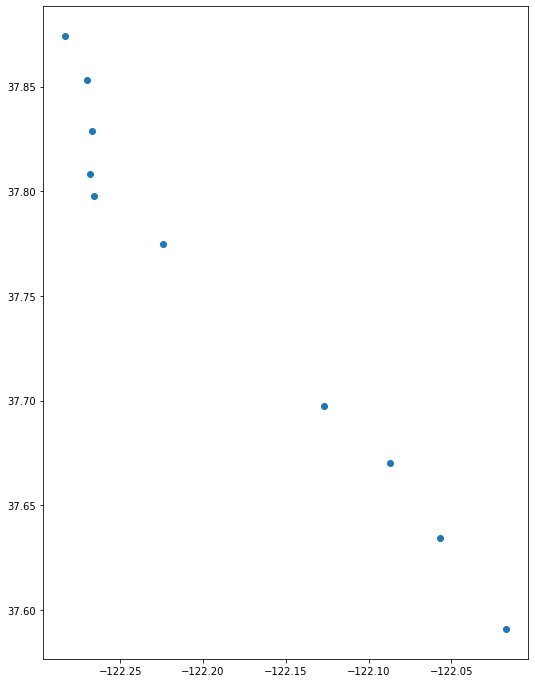

In [130]:
stations.plot(figsize=(12,12))

/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:860: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:882: RuntimeWarning: invalid value encountered in subtract
  ycd = np.abs(yc - yc_med)


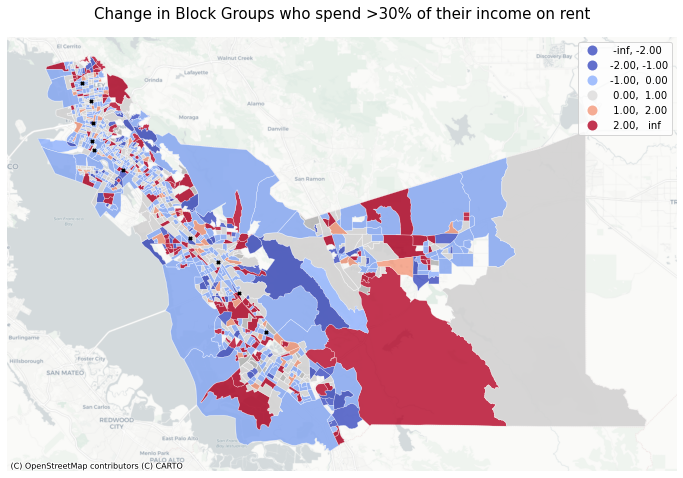

In [135]:
fig, ax = plt.subplots(figsize=(12,12))

# block groups
bg_wm.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

focus_chg_wm.plot(ax=ax,
           column = '>30%_change',
         cmap='coolwarm', 
         edgecolor='white',
         alpha=0.8,
           scheme='user_defined',
            classification_kwds={'bins':[-2,-1, 0, 1, 2]},
            linewidth=0.3,
            legend=True)

stations_web_mercator.plot(ax=ax,
                           color = 'black',
                           marker = 'X',
                           markersize = 10)


ax.axis('off')
ax.set_title('Change in Block Groups who spend >30% of their income on rent',fontsize=15,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:860: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:882: RuntimeWarning: invalid value encountered in subtract
  ycd = np.abs(yc - yc_med)


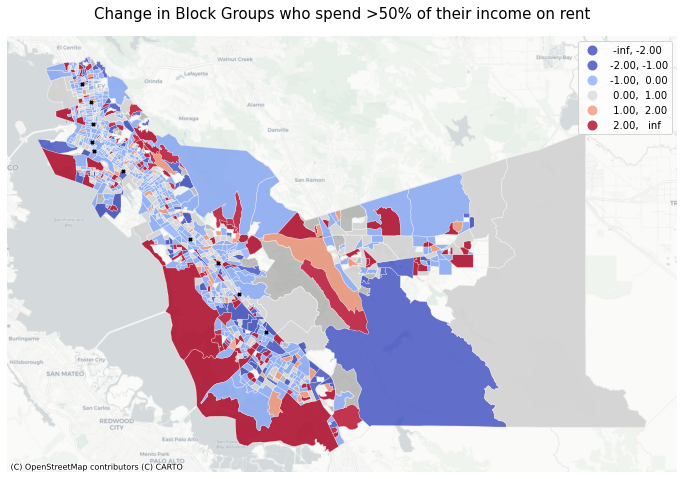

In [136]:
fig, ax = plt.subplots(figsize=(12,12))

# block groups
bg_wm.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

focus_chg_wm.plot(ax=ax,
           column = '>50%_change',
         cmap='coolwarm', 
         edgecolor='white',
         alpha=0.8,
           scheme='user_defined',
            classification_kwds={'bins':[-2,-1, 0, 1, 2]},
            linewidth=0.3,
            legend=True)

stations_web_mercator.plot(ax=ax,
                           color = 'black',
                           marker = 'X',
                           markersize = 10)




ax.axis('off')
ax.set_title('Change in Block Groups who spend >50% of their income on rent',fontsize=15,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

I'm going to start a fresh notebook so that I can do the spatial analysis and make better maps. I want to zoom in to focus on the areas around the stations, so I need to figure out how to do that, but everything is moving slowly in this notebook so I should start fresh.

In [137]:
focus_chg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1047 entries, 0 to 1046
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   GEOID        1047 non-null   object  
 1   geometry     1047 non-null   geometry
 2   Name         1047 non-null   object  
 3   <10%_change  539 non-null    float64 
 4   >50%_change  941 non-null    float64 
 5   >30%_change  957 non-null    float64 
dtypes: float64(3), geometry(1), object(2)
memory usage: 57.3+ KB


In [139]:
focus_chg.to_file("Focus_chg_use.geojson", driver='GeoJSON')